In [1]:
# Imports
import numpy as np
import pandas as pd # Pandas for DataFrame management
import seaborn as sns # Seaborn for Graphs
import matplotlib.pyplot as plt # PyPlot
from sklearn.model_selection import train_test_split # Train/Test Model Splitter
from sklearn import tree # Import all of sklearn.tree
from sklearn.preprocessing import MinMaxScaler #Imports 'MinMaxScaler' for Normalization Purposes
from sklearn.metrics import classification_report, confusion_matrix # Import both classification_report and confusion_matrix


# Import Warnings and Disable Warnings since the "Score" method calls methods with unimplemented attributes,
# that needs to be implemented in the coming SKLearn 11 release.
import warnings # Imports 'warnings'
warnings.filterwarnings('ignore') # Disables Warnings

In [2]:
# Read our Data CSV's
df = pd.read_csv('data/datatraining.csv', delimiter=';') # delimited using semicolon ';' due to the csv being excel formatted.

# Splitting the DataFrame into a new normalised DataFrame only containing 'Temperature, Humidity, Light, CO2, HumidityRatio'
mm_df = pd.DataFrame(MinMaxScaler().fit_transform(df.iloc[:,[2,3,4,5,6,7]]))

# Grabbing the labels from the original DataFrame for 'Occupancy'
labels = []
for row in df.iloc[:,6]:
    labels.append(row)

# Assigning the names to the normalised DataFrame columns since they get turned into raw numbers on normalisation.
mm_df = mm_df.assign(Class=labels)
mm_df.rename(columns={0:'Temperature'}, inplace=True)   # C0: Temperature
mm_df.rename(columns={1:'Humidity'}, inplace=True)      # C1: Humidity
mm_df.rename(columns={2:'Light'}, inplace=True)         # C2: Light
mm_df.rename(columns={3:'CO2'}, inplace=True)           # C3: CO2
mm_df.rename(columns={4:'HumidityRatio'}, inplace=True) # C4: HumidityRatio
mm_df.rename(columns={5:'Occupancy'}, inplace=True)     # C5: Occupancy

# Calls head on the DataFrame to show the top 5 rows of the DataFrame
print(df.head())
print()
print(mm_df.head())

   Entry              Date  Temperature  Humidity  Light     CO2  \
0      1  2015-02-04 17:51        23.18   27.2720  426.0  721.25   
1      2  2015-02-04 17:51        23.15   27.2675  429.5  714.00   
2      3  2015-02-04 17:53        23.15   27.2450  426.0  713.50   
3      4  2015-02-04 17:54        23.15   27.2000  426.0  708.25   
4      5  2015-02-04 17:55        23.10   27.2000  426.0  704.50   

   HumidityRatio  Occupancy  
0       0.004793          1  
1       0.004783          1  
2       0.004779          1  
3       0.004772          1  
4       0.004757          1  

   Temperature  Humidity     Light       CO2  HumidityRatio  Occupancy  \
0     1.000000  0.470533  0.275490  0.190933       0.557318        1.0   
1     0.992823  0.470332  0.277754  0.186446       0.554807        1.0   
2     0.992823  0.469326  0.275490  0.186136       0.553761        1.0   
3     0.992823  0.467315  0.275490  0.182887       0.551669        1.0   
4     0.980861  0.467315  0.275490  0.18

In [3]:
# Prints the statistical data of the dataset with Entry and Occupancy dropped, and rounded to 2 decimal places.
print(round(df.drop(labels=['Entry', 'Occupancy'], axis=1).describe(), 2))
print()
print(round(mm_df.describe(), 2))

       Temperature  Humidity    Light      CO2  HumidityRatio
count      8143.00   8143.00  8143.00  8143.00        8143.00
mean         20.62     25.73   119.52   606.55           0.00
std           1.02      5.53   194.76   314.32           0.00
min          19.00     16.74     0.00   412.75           0.00
25%          19.70     20.20     0.00   439.00           0.00
50%          20.39     26.22     0.00   453.50           0.00
75%          21.39     30.53   256.38   638.83           0.00
max          23.18     39.12  1546.33  2028.50           0.01

       Temperature  Humidity    Light      CO2  HumidityRatio  Occupancy  \
count      8143.00   8143.00  8143.00  8143.00        8143.00    8143.00   
mean          0.39      0.40     0.08     0.12           0.31       0.21   
std           0.24      0.25     0.13     0.19           0.22       0.41   
min           0.00      0.00     0.00     0.00           0.00       0.00   
25%           0.17      0.15     0.00     0.02           0.11

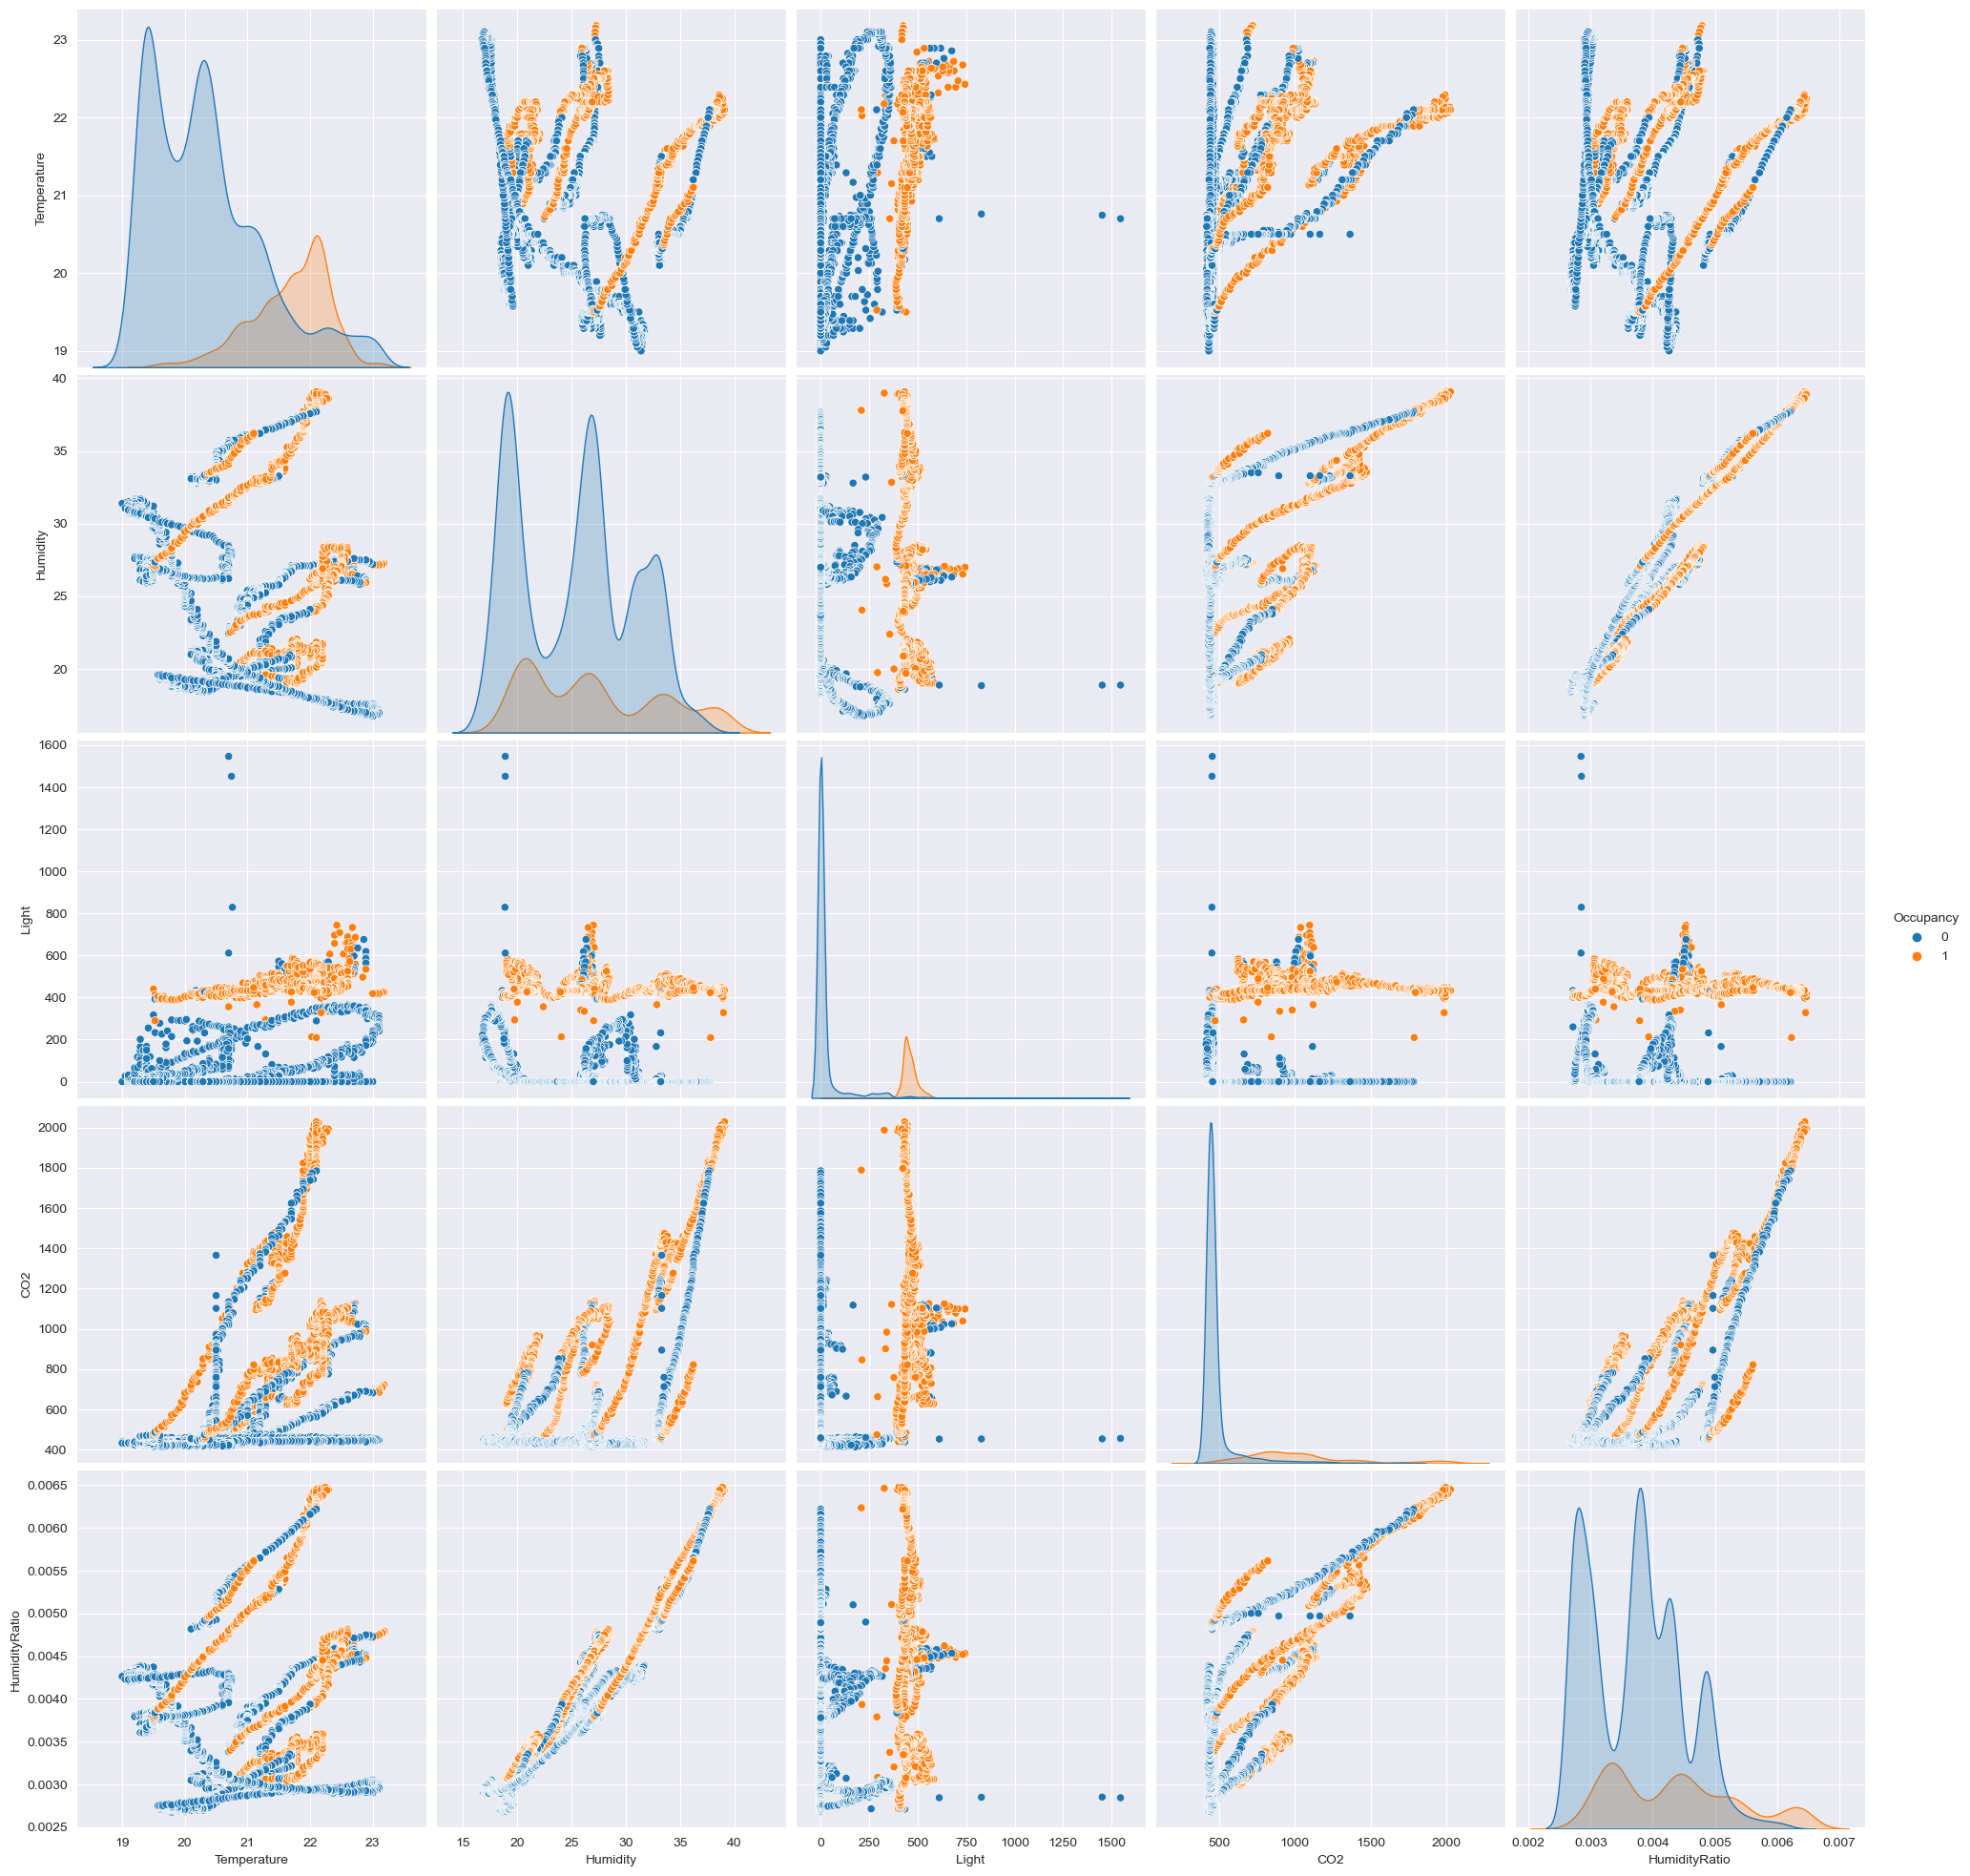

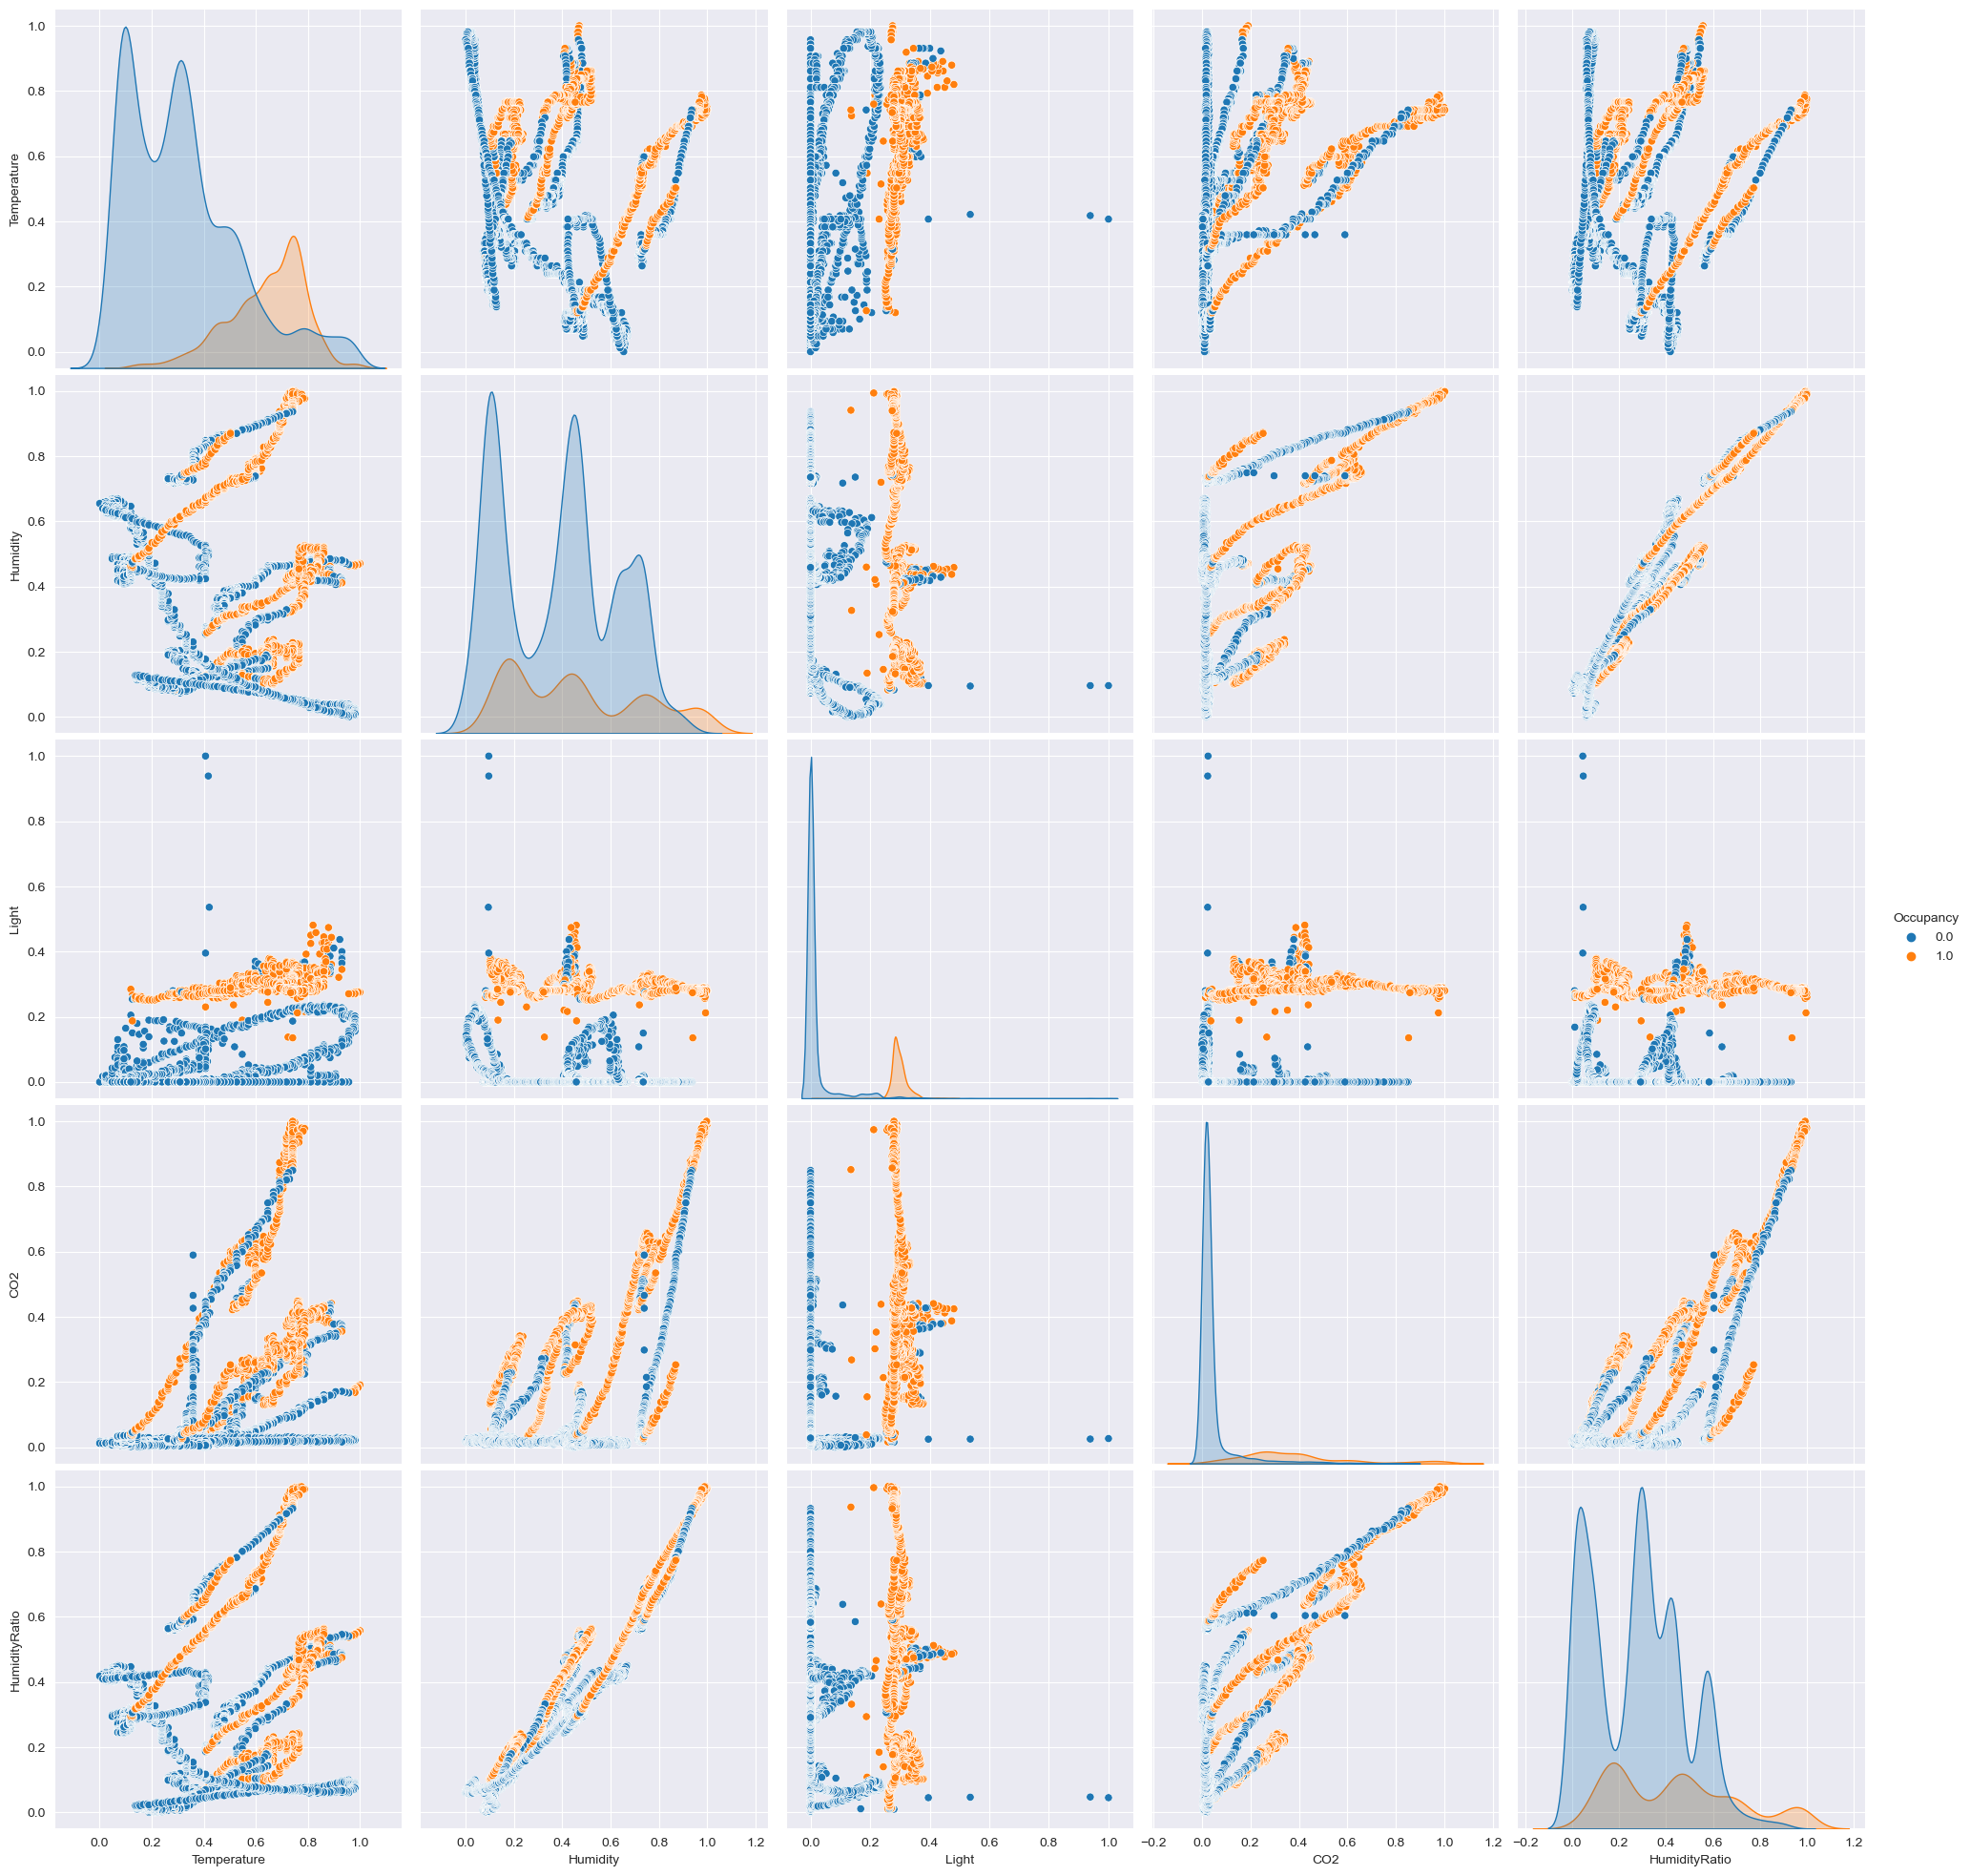

In [4]:
# Displays the data using a Seaborn PairPlot, hued to the occupancy status of the recorded space.
# Seaborn PairPlot: https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(data=df, vars=['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], hue='Occupancy', size=4)
sns.pairplot(data=mm_df, vars=['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], hue='Occupancy', size=4)
plt.show()

In [5]:
# Generic Method for grabbing the Train/Test Split Data
#
# Takes in the following:
#   | paramName  | DataType         | Default |
#   |-----------------------------------------|
#   | test_size  | float            | 0.25    |
#   | normalized | bool             | False   |
#   | data       | pandas.DataFrame | df      |
#   | ndata      | pandas.DataFrame | mm_df   |
#
def get_train_test_split(test_size:float=0.25, normalized:bool=False, data:pd.DataFrame=df, ndata:pd.DataFrame=mm_df):
    # If not normalized use the normal dataset
    if normalized is False:
        x_train, x_test, y_train, y_test = train_test_split(
            data[['Temperature','Humidity','Light','CO2','HumidityRatio']], # We specify that these are the 5 data columns we want to use.
            data['Occupancy'],                                              # We specify that this is our target column, aka this is what we want to predict.
            random_state=123,                                               # We set a random_state for the splitter, so we have reproducible data splits.
            test_size=test_size                                             # We set the test_size to be equal to either 0.25 or the passed in variable.
        )
        return x_train, x_test, y_train, y_test                             # We return the x_train, x_test, y_train, y_test data splits.
    # Else use the normalized dataset
    else:
        x_train, x_test, y_train, y_test = train_test_split(
            ndata[['Temperature','Humidity','Light','CO2','HumidityRatio']],# We specify that these are the 5 data columns we want to use.
            ndata['Occupancy'],                                             # We specify that this is our target column, aka this is what we want to predict.
            random_state=123,                                               # We set a random_state for the splitter, so we have reproducible data splits.
            test_size=test_size                                             # We set the test_size to be equal to either 0.25 or the passed in variable.
        )
        return x_train, x_test, y_train, y_test                             # We return the x_train, x_test, y_train, y_test data splits.

# Generic Method for running the various DecisionTree-configurations for the test
#
# Takes in the following:
#   | paramName    | DataType         | Default |
#   |-------------------------------------------|
#   | test_size    | float            | 0.25    |
#   | normalized   | bool             | False   |
#   | display      | bool             | False   |
#   | random_state | int              | None    |
#
def run_decision_tree(test_size:float=0.25, normalized:bool=False, display:bool=False, random_state:int=None):
    x_train, x_test, y_train, y_test = get_train_test_split(test_size, normalized) # Grabs the Train/Test Split data.

    model = tree.DecisionTreeClassifier(random_state=random_state)  # Creates the DecisionTreeClassifier with a default RandomState of None.
    model.fit(x_train, y_train)                                     # Fits our X and Y training data to the Classifier 'model'.
    predictions = model.predict(x_test)                             # Does a prediction on our X_test set.

    if display:                                                     # If display is enabled.
        print(confusion_matrix(y_test, predictions))                # Print the Confusion Matrix for this run.
        print(classification_report(y_test, predictions))           # Print the Classification Report for this run.
        tree.plot_tree(model)                                       # Print the Classification Tree for this run.
        plt.show()                                                  # Call PyPlot.show().

    return model.score(x_test, y_test), y_test, predictions         # Return the Accuracy Score for this Run, Y_Test and the X_test Prediction.

# Our Method for running the full test-suite
def run_decision_tree_test():
    should_display = False      # Change this variable if you want to display confusion_matrix, classification_report and tree diagrams for **ALL** 400 runs!
    ratios = [0.25, 0.5]        # Our two chosen ratios for testing [0.25 = 25% | 0.5 = 50%].
    total_accuracy_sum = 0.0    # Sum of all Accuracies across all runs.
    god_run = 0.0               # The singular best run across all our 400 runs.

    print('Running Decision-Tree Test')
    for i in range(0,2): # Loops twice, once for each DataSet (Raw & Normalized).
        df_accuracy_sum = 0.0 # Sum of all Accuracies for this DataSet-run.
        print('---------------------------------------------------------------------------------------------')
        if i == 0: # If it's 0 use the Raw DataSet.
            best_run = 0.0 # Best Run for this DataSet.
            y_test_sum = [] # Sum of all Y_Tests for this DataSet.
            prediction_sum = [] # Sum of all Predictions for this Dataset.
            for ratio in ratios: # For each of our test size rations loop.
                best_ratio_run = 0.0 # Best Run for this Ratio and DataSet.
                ratio_y_test_sum = [] # Sum of y_tests for this Ratio and Dataset.
                ratio_prediction_sum = [] # Sum of predictions for this Ratio and Dataset.
                accuracy_sum = 0.0 # Sum of all Accuracies for this ratio-run.
                for j in range(0,100): # Loop 100 Times per assignment instructions.
                    output = run_decision_tree(test_size=ratio, normalized=False, display=should_display) # output of this singular test.
                    if best_ratio_run < output[0]: # Is the accuracy of this run better than the accuracy of the currently best run for this ratio.
                        best_ratio_run = output[0]                  # If it is then set the best run for this ratio to this runs' accuracy.
                    accuracy_sum += output[0]                       # Add this runs accuracy to the sum of all runs for this ratio.
                    for k in range(len(output[1])):                 # For each "value" in the y_test.
                        ratio_y_test_sum.append(output[1].iloc[k])  # Add the y_test result to the sum of y_tests for this ratio.
                        ratio_prediction_sum.append(output[2][k])   # Add the predictions to the sum of predictions for this ratio.
                # Print out our data for the runs of this ratio.
                print(f'DataSet: Raw | Ratio: {ratio} | Avg. Accuracy: {round(accuracy_sum/100, 4)} | Best Ratio Run: {round(best_ratio_run, 4)}')
                print(f'Confusion Matrix: ')
                print(pd.crosstab(np.array(ratio_y_test_sum), np.array(ratio_prediction_sum), rownames=['Actual'], colnames=['Predicted']))
                print('---------------------------------------------------------------------------------------------')
                df_accuracy_sum += accuracy_sum         # Add the sum of the runs to the sum of the runs for this DataSet.
                y_test_sum += ratio_y_test_sum          # Add the sum of the y_tests to the sum of the runs for this DataSet.
                prediction_sum += ratio_prediction_sum  # Add the sum of the predictions to the sum of the runs for this DataSet.
                if best_run < best_ratio_run:           # Is the accuracy of the best ratio run better than the best run for this DataSet thus far
                    best_run = best_ratio_run           # If it is then set the best run for this DataSet to this the ratio runs' accuracy.
            # Print out our data for the runs of this DataSet
            print(f'Avg. Accuracy for All Runs using Raw DataSet: {round(df_accuracy_sum/200, 4)} | Best DataFrame Run: {round(best_run, 4)}')
            print(f'Confusion Matrix: ')
            print(pd.crosstab(np.array(y_test_sum), np.array(prediction_sum), rownames=['Actual'], colnames=['Predicted']))
            # If the Best_Run is better than the 'god_run' then replace the value of the god_run with the value of this best_run
            if god_run < best_run:
                god_run = best_run
        else: # Else use the Raw DataSet.
            best_run = 0.0 # Best Run for this DataSet.
            y_test_sum = [] # Best Run for this DataSet.
            prediction_sum = [] # Sum of all Predictions for this Dataset.
            for ratio in ratios: # For each of our test size rations loop.
                best_ratio_run = 0.0 # Best Run for this Ratio and DataSet.
                ratio_y_test_sum = [] # Sum of y_tests for this Ratio and Dataset.
                ratio_prediction_sum = [] # Sum of predictions for this Ratio and Dataset.
                accuracy_sum = 0.0 # Sum of all Accuracies for this ratio-run.
                for j in range(0,100): # Loop 100 Times per assignment instructions.
                    output = run_decision_tree(test_size=ratio, normalized=True, display=should_display) # output of this singular test.
                    if best_ratio_run < output[0]: # Is the accuracy of this run better than the accuracy of the currently best run for this ratio.
                        best_ratio_run = output[0]                  # If it is then set the best run for this ratio to this runs' accuracy.
                    accuracy_sum += output[0]                       # Add this runs accuracy to the sum of all runs for this ratio.
                    for k in range(len(output[1])):                 # For each "value" in the y_test.
                        ratio_y_test_sum.append(output[1].iloc[k])  # Add the y_test result to the sum of y_tests for this ratio.
                        ratio_prediction_sum.append(output[2][k])   # Add the predictions to the sum of predictions for this ratio.
                # Print out our data for the runs of this ratio.
                print(f'DataSet: Normalised | Ratio: {ratio} | Avg. Accuracy: {round(accuracy_sum/100, 4)} | Best Ratio Run: {round(best_ratio_run, 4)}')
                print(f'Confusion Matrix: ')
                print(pd.crosstab(np.array(ratio_y_test_sum), np.array(ratio_prediction_sum), rownames=['Actual'], colnames=['Predicted']))
                print('---------------------------------------------------------------------------------------------')
                df_accuracy_sum += accuracy_sum         # Add the sum of the runs to the sum of the runs for this DataSet.
                y_test_sum += ratio_y_test_sum          # Add the sum of the y_tests to the sum of the runs for this DataSet.
                prediction_sum += ratio_prediction_sum  # Add the sum of the predictions to the sum of the runs for this DataSet.
                if best_run < best_ratio_run:           # Is the accuracy of the best ratio run better than the best run for this DataSet thus far
                    best_run = best_ratio_run           # If it is then set the best run for this DataSet to this the ratio runs' accuracy.
            # Print out our data for the runs of this DataSet
            print(f'Avg. Accuracy for All Runs using Normalised DataSet: {round(df_accuracy_sum/200, 4)} | Best DataFrame Run: {round(best_run, 4)}')
            print(f'Confusion Matrix: ')
            print(pd.crosstab(np.array(y_test_sum), np.array(prediction_sum), rownames=['Actual'], colnames=['Predicted']))
            # If the Best_Run is better than the 'god_run' then replace the value of the god_run with the value of this best_run
            if god_run < best_run:
                god_run = best_run
        total_accuracy_sum += df_accuracy_sum # Add the accuracy sum of all runs for this dataframe to the total_accuracy_sum
    print('---------------------------------------------------------------------------------------------')
    # Print out our data for the total test and all runs.
    print(f'Avg. Accuracy for All Runs: {round(total_accuracy_sum/400, 4)} | Best Run Overall: {round(god_run, 4)}')

In [7]:
run_decision_tree_test()

Running Decision-Tree Test
---------------------------------------------------------------------------------------------
DataSet: Raw | Ratio: 0.25 | Avg. Accuracy: 0.9941 | Best Ratio Run: 0.9956
Confusion Matrix: 
Predicted       0      1
Actual                  
0          157907    593
1             615  44485
---------------------------------------------------------------------------------------------
DataSet: Raw | Ratio: 0.5 | Avg. Accuracy: 0.9892 | Best Ratio Run: 0.9902
Confusion Matrix: 
Predicted       0      1
Actual                  
0          316740    860
1            3546  86054
---------------------------------------------------------------------------------------------
Avg. Accuracy for All Runs using Raw DataSet: 0.9916 | Best DataFrame Run: 0.9956
Confusion Matrix: 
Predicted       0       1
Actual                   
0          474647    1453
1            4161  130539
---------------------------------------------------------------------------------------------
Dat